## Testing Agent on new emails

## Launch Notebooks

In [0]:
%run ./03_Agent_Graph_inMemory

# LangGraph Agent in Memory
Defining the agent's graph (state, nodes, edges) and run it in memory.

## Env & Variables
Running package install and defining global variables from separate Notebooks.

In [0]:
#%run ./00_Environment

# Global Variables definition
Creating global variables.

In [0]:
#%run ./00_Variables

# Prompts Definition
Defining all prompts for the nodes and tools used by the agent.

## Set up ML flow Experiment

In [0]:
experiment_name_ = "Email_Classificator_Agent_20260127"

## Classification Prompt
Prompt used by the classification tool.

In [0]:
import mlflow
experiment_path = experiment_dir_ + experiment_name_
experiment = mlflow.get_experiment_by_name(experiment_path)

if experiment is not None:
    experiment_id = experiment.experiment_id
else:
    experiment_id = mlflow.create_experiment(name=experiment_path)

## Schemas
Defining the desired agent's State and output schemas.

## LLMs
Defining the base LLM to be used by the agent nodes.

## Run Tests

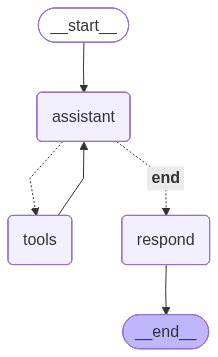

## Testing
Run a test case with Notebook context

'We received from: sofia.rossi@example.com the following email: Understood, thank you.'

In [0]:
## Save test cases
spark.sql("USE CATALOG "+catalog_)
spark.sql("USE SCHEMA "+schema_)
df_test_emails = spark.table("classificator_agent_emails")

In [0]:
## Create helper function
from pyspark.sql.functions import *
from langchain_core.messages import HumanMessage

# Extract test case from the dataframe with examples
def launch_agent(id_, run_name_ = "Test new emails 27 Jan 2026"):
  """ Launch agent on the email associated to the record id_"""

  ## Prepare request
  test_record = df_test_emails.filter(col("Email_Id") == id_).first()
  message_ = f"We received from: {test_record.Email_Sender} the following email: {test_record.Email_Body}"
  print("\n\n***************************************\n")
  print(":: Testing agent on record %d:\n" % id_)
  display(message_)

  ## Invoke the Agent
  config_ = {"configurable": {"thread_id": id_}} # Not required if we're not using memory
  mlflow.langchain.autolog()
  with mlflow.start_run(experiment_id=experiment_id, run_name=run_name_):
    request = [
      HumanMessage(content = message_)
    ]
    messages = react_email_classifier.invoke({"messages": request}, config_)

    for m in messages['messages']:
        m.pretty_print()

================================ Human Message =================================

We received from: sofia.rossi@example.com the following email: Understood, thank you.
================================== Ai Message ==================================

I'll help you classify this email. Let me retrieve the relevant context information for this customer.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_01AsD4DFpteqn7mhPwxSiuPG)
 Call ID: toolu_bdrk_01AsD4DFpteqn7mhPwxSiuPG
  Args:
    customer_email: sofia.rossi@example.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "Row(Customer_Id=3, Name='Sofia', Surname='Rossi', Email='sofia.rossi@example.com', Address='Via Milano 11, 20126 Milano, Italy')"}
================================== Ai Message ==================================

Now let me retrieve the order and ticke

Trace(trace_id=tr-5948a32beda48dca16db6108c54952c8)

customer_details
"List(3, Sofia, Rossi, sofia.rossi@example.com, Via Milano 11, 20126 Milano, Italy)"


order_details
"List(ID-45892183, 2025-11-11, [""Mouse Pad"", ""Ergonomic Wrist Rest""], 42.3, 3)"


ticket_details
"List(3, TKT-004, 2025-11-28 10:48:57, Dear team, I returned an item last week but haven’t received my refund confirmation yet. When should I expect it?, Returns & Refunds)"


In [0]:
## Launch Tests
test_email_ids = [row.Email_Id for row in df_test_emails.select("Email_Id").collect()]

for id_ in test_email_ids:
  launch_agent(id_)



***************************************

:: Testing agent on record 1:



'We received from: jonas.mueller@example.com the following email: Hi, I received my order today, but one of the items is missing. Could you please check if it will be sent separately?'

================================ Human Message =================================

We received from: jonas.mueller@example.com the following email: Hi, I received my order today, but one of the items is missing. Could you please check if it will be sent separately?
================================== Ai Message ==================================

I'll help you classify this email and retrieve the relevant context. Let me start by gathering information about this customer.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_01TmS9rY79ZFjJm1KVQi9N87)
 Call ID: toolu_bdrk_01TmS9rY79ZFjJm1KVQi9N87
  Args:
    customer_email: jonas.mueller@example.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "Row(Customer_Id=2, Name='Jonas', Surname='M\u00fcller', Email='jonas.mueller@example.com', Address='221B Baker Street, NW1 6XE L

'We received from: carla.lindberg@example.com the following email: Hello, I’d like to return the document tray I bought. Could you let me know the return steps?'

================================ Human Message =================================

We received from: carla.lindberg@example.com the following email: Hello, I’d like to return the document tray I bought. Could you let me know the return steps?
================================== Ai Message ==================================

I'll help you classify this email and suggest next steps. Let me first retrieve the relevant customer information.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_01P2TdwMqSj8765CRviWMHfb)
 Call ID: toolu_bdrk_01P2TdwMqSj8765CRviWMHfb
  Args:
    customer_email: carla.lindberg@example.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "Row(Customer_Id=9, Name='Carla', Surname='Lindberg', Email='carla.lindberg@example.com', Address='Sveav\u00e4gen 15, 111 57 Stockholm, Sweden')"}
=================

'We received from: markus.weber@example.com the following email: Good afternoon, I noticed an unauthorized charge on my credit card from your store. Can you please verify what this order refers to?'

================================ Human Message =================================

We received from: markus.weber@example.com the following email: Good afternoon, I noticed an unauthorized charge on my credit card from your store. Can you please verify what this order refers to?
================================== Ai Message ==================================

I'll help you classify this email and retrieve the relevant context. Let me start by looking up the customer information and related data.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_01Enb6XjMAom5XkBDUvpiB9j)
 Call ID: toolu_bdrk_01Enb6XjMAom5XkBDUvpiB9j
  Args:
    customer_email: markus.weber@example.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "Row(Customer_Id=18, Name='Markus', Surname='Weber', Email='markus.weber@example.com', Address='Bahnhofst

'We received from: sofia.petrova@example.com the following email: Dear team, could you please delete my account and all personal information as per GDPR regulations?'

================================ Human Message =================================

We received from: sofia.petrova@example.com the following email: Dear team, could you please delete my account and all personal information as per GDPR regulations?
================================== Ai Message ==================================

I'll help you classify this email. Let me first retrieve the relevant customer information.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_01PKcAzA8KWGBJbpqEckgUwY)
 Call ID: toolu_bdrk_01PKcAzA8KWGBJbpqEckgUwY
  Args:
    customer_email: sofia.petrova@example.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "Row(Customer_Id=19, Name='Sofia', Surname='Petrova', Email='sofia.petrova@example.com', Address='ul. Vitosha 67, 1000 Sofia, Bulgaria')"}
================================== Ai Messag

'We received from: david.nguyen@example.com the following email: Hi there, when will the blue version of the wireless headphones be restocked? I’ve been waiting for weeks!'

================================ Human Message =================================

We received from: david.nguyen@example.com the following email: Hi there, when will the blue version of the wireless headphones be restocked? I’ve been waiting for weeks!
================================== Ai Message ==================================

I'll help you classify this email and suggest next steps. Let me first retrieve the relevant customer information.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_018EWt1bhTBVnQUP2QvR4qWh)
 Call ID: toolu_bdrk_018EWt1bhTBVnQUP2QvR4qWh
  Args:
    customer_email: david.nguyen@example.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "Row(Customer_Id=6, Name='David', Surname='Nguyen', Email='david.nguyen@example.com', Address='Damrak 45, 1012 LL Amsterdam, Netherlands')"}
==============

'We received from: newsletter@shopupdates.com the following email: Exciting new deals for this weekend! Get up to 50% off on electronics and home decor. Don’t miss out!'

================================ Human Message =================================

We received from: newsletter@shopupdates.com the following email: Exciting new deals for this weekend! Get up to 50% off on electronics and home decor. Don’t miss out!
================================== Ai Message ==================================
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_01ASCRdYXMbqdcPyCuPNFqdB)
 Call ID: toolu_bdrk_01ASCRdYXMbqdcPyCuPNFqdB
  Args:
    customer_email: newsletter@shopupdates.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "None"}
================================== Ai Message ==================================

Since no customer was found in the database with the email address "newsletter@shopupdates.com", I'll proceed with the classification using the available information.
Tool Calls:
  c

'We received from: sofia.rossi@example.com the following email: Understood, thank you.'

================================ Human Message =================================

We received from: sofia.rossi@example.com the following email: Understood, thank you.
================================== Ai Message ==================================

I'll help you classify this email. Let me retrieve the relevant context information for this customer.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_01BorWskWbpU8erKYmgN5PgP)
 Call ID: toolu_bdrk_01BorWskWbpU8erKYmgN5PgP
  Args:
    customer_email: sofia.rossi@example.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "Row(Customer_Id=3, Name='Sofia', Surname='Rossi', Email='sofia.rossi@example.com', Address='Via Milano 11, 20126 Milano, Italy')"}
================================== Ai Message ==================================

Now let me retrieve the order and ticke

[Trace(trace_id=tr-6aa65d727b4896b57d5d9ad041879543), Trace(trace_id=tr-849b20cd6e34d353d6aa84f2a5656a2c), Trace(trace_id=tr-bafeb16e58233fbd31308d540713796a), Trace(trace_id=tr-1a8b5450e79c2a0e6525617cac6b7906), Trace(trace_id=tr-88d5582e385e11be5aabda2ad7bb98ac), Trace(trace_id=tr-1d1de7b9d57f6d9556d371fb608aa3b6), Trace(trace_id=tr-1d4774e2b99dc05c3c918c1753bc2a88)]

### Verify conext info

In [0]:
%sql
-- Available Context: Customer Details
SELECT classificator_agent_customer_retriever('david.nguyen@example.com') AS customer_details;

customer_details
"List(6, David, Nguyen, david.nguyen@example.com, Damrak 45, 1012 LL Amsterdam, Netherlands)"


In [0]:
%sql
-- Available Context: Order Details
SELECT classificator_agent_order_retriever(6) AS order_details;

order_details
"List(ID-45892186, 2025-11-20, [""Network Switch 8-port"", ""Ethernet Cables (5x)""], 224.8, 6)"


In [0]:
%sql
-- Available Context: Ticket Details
SELECT classificator_agent_ticket_retriever(6) AS ticket_details;

ticket_details
null
